# Ex 1
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.

### Fet al repositori git

# Ex 2
Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

     Important

    El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [68]:
import pandas as pd
import numpy as mp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('movies.dat',
                 encoding='latin-1',
                 header=None,
                 delimiter='::',
                 engine='python',
                 names=['ID','Title','Genre']
                )
df

,ID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama



En 'Title' s'inclou l'any de la pel·licula. S'ha de separar en nova columna.<br/>
En 'Genre' n'hi ha de vàries entrades, s'han de separar i seleccionar un gènere per cada pel·lícula, separades amb | <br/>

In [70]:
# Conèixer dimensió del df (línies, columnes)
df.shape

(3883, 3)

In [71]:
# Explorar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3883 non-null   int64 
 1   Title   3883 non-null   object
 2   Genre   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [73]:
# Explorar tipus de dades agregades
df['Genre'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [74]:
# Separació de gèneres amb split
df['Genre'] = df['Genre'].str.split('|')

In [75]:
df

,ID,Title,Genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy]
3879,3949,Requiem for a Dream (2000),[Drama]
3880,3950,Tigerland (2000),[Drama]
3881,3951,Two Family House (2000),[Drama]


In [76]:
# Extracció del primer gènere per posició amb str
df['Genre'] = df['Genre'].str[0]

In [77]:
df

,ID,Title,Genre
0,1,Toy Story (1995),Animation
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [78]:
# Explorar tota la columna 'Title'
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df['Title'])

0                                        Toy Story (1995)
1                                          Jumanji (1995)
2                                 Grumpier Old Men (1995)
3                                Waiting to Exhale (1995)
4                      Father of the Bride Part II (1995)
5                                             Heat (1995)
6                                          Sabrina (1995)
7                                     Tom and Huck (1995)
8                                     Sudden Death (1995)
9                                        GoldenEye (1995)
10                         American President, The (1995)
11                     Dracula: Dead and Loving It (1995)
12                                           Balto (1995)
13                                           Nixon (1995)
14                                Cutthroat Island (1995)
15                                          Casino (1995)
16                           Sense and Sensibility (1995)
17            

In [79]:
# Com que les dades tenen la mateixa estructura, es pot extreure l'any per posició
df['Year'] = df['Title'].str[-5:-1]

In [80]:
df

,ID,Title,Genre,Year
0,1,Toy Story (1995),Animation,1995
1,2,Jumanji (1995),Adventure,1995
2,3,Grumpier Old Men (1995),Comedy,1995
3,4,Waiting to Exhale (1995),Comedy,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [81]:
# Esborrar l'any de 'Title'
df['Title'] = df['Title'].str[0:-7]
df

,ID,Title,Genre,Year
0,1,Toy Story,Animation,1995
1,2,Jumanji,Adventure,1995
2,3,Grumpier Old Men,Comedy,1995
3,4,Waiting to Exhale,Comedy,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [83]:
df = df.reset_index(drop=True)
df

,ID,Title,Genre,Year
0,1,Toy Story,Animation,1995
1,2,Jumanji,Adventure,1995
2,3,Grumpier Old Men,Comedy,1995
3,4,Waiting to Exhale,Comedy,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [84]:
# Reindexar i treure la columna ID
df = df.reindex(columns=['Title', 'Genre', 'Year'])
df

,Title,Genre,Year
0,Toy Story,Animation,1995
1,Jumanji,Adventure,1995
2,Grumpier Old Men,Comedy,1995
3,Waiting to Exhale,Comedy,1995
4,Father of the Bride Part II,Comedy,1995
...,...,...,...
3878,Meet the Parents,Comedy,2000
3879,Requiem for a Dream,Drama,2000
3880,Tigerland,Drama,2000
3881,Two Family House,Drama,2000


In [85]:
# Comprovar tipus de dades
df.dtypes

Title    object
Genre    object
Year     object
dtype: object

#### El següent pas és preparar les dades per a la seva posterior manipulació.

In [86]:
# Conversió d'objecte a int
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [87]:
# Conversió d'objecte a categòrica
df['Title'], df['Genre'] = pd.Categorical(df['Title']), pd.Categorical(df['Genre'])

In [88]:
# Comprovem si hi ha valors nulls
df.isnull().sum()

Title    0
Genre    0
Year     0
dtype: int64

Ara les dades ja estan tractades per ser analitzades en visualitzacions.

# Ex 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

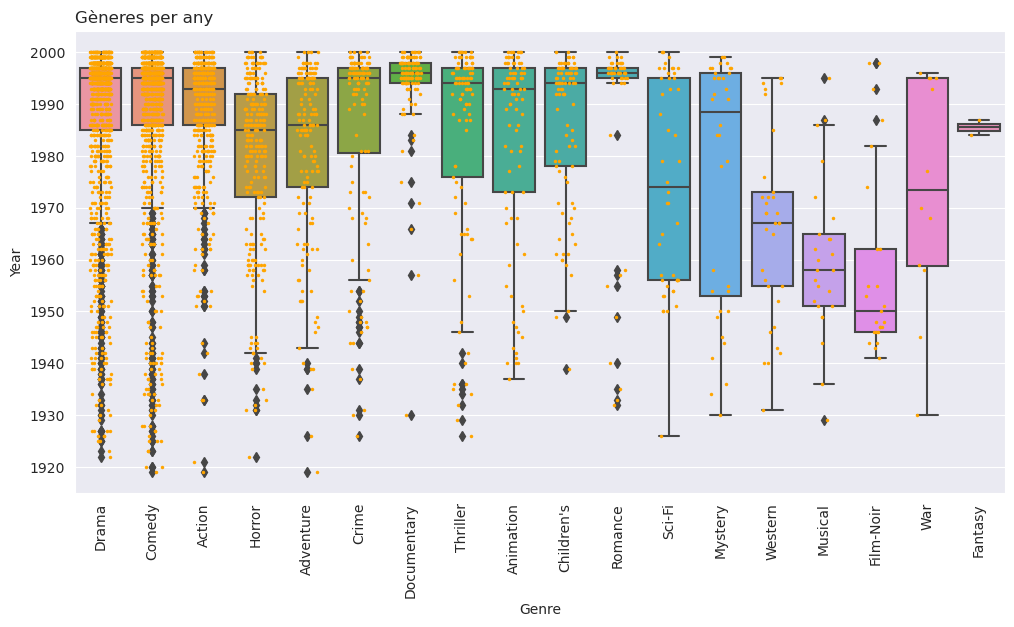

In [121]:
# Configuració de canvas
plt.figure(figsize=(12, 6))

# Boxplot
with sns.axes_style("darkgrid"):
    ax = sns.boxplot(x='Genre', y='Year', data=df, order = df['Genre'].value_counts().index)

# Afegir stripplot
ax = sns.stripplot(x='Genre', y='Year', data=df, color="orange", jitter=0.2, size=2.5, order = df['Genre'].value_counts().index)

# Etiquetes
plt.title("Gèneres per any", loc="left")
plt.xticks(rotation=90)

# plt.grid()
plt.show()


El boxplot amb stripplot, amb columnes ordenades de més número total de pel·licules (esquerra) a menys (dreta), mostra que en les categories Drama, Comedy i Action hi ha una concentració de registres entre 1985 i 1995. Aquests anys  acumulen aproximadament el 50% de pel·lícules de cada categoria.<br>
Drama, Comedy i Action també són els gèneres que contenen més pel·lícules al llarg del temps, amb una representació constant entre 1920 entre 1970.<br><br>
Els gèneres Horror i Adventure tenen el màxim esplendor dins la seva categoria entre meitats dels anys 70 i finals dels 90. Aquests gèneres, tot i tenir els primers registres , però també presenten algunes pel·lícules antigues dels anys 30 i 40.<br><br>
Documentary i Romance, amb distribucions similars entre ells, ténen el seu boom a partir de meitat dels 90.<br><br>
Sci-Fi i Mistery mostren un públic no molt nombrós però fidel: presenten pel·lícules constantment dels any 50 als 90 sobre tot. Passa el mateix amb el gènere War però amb menys pel·lícules.<br><br>
Per últim, els gèneres Western, Musical i Film-Noir –amb distribucions similars–, ja s'han passat de moda: van tindre la seva esplendor entre els anys 40 i 70.<br><br>
Aquesta visualització ha estat escollida perquè mostra d'un cop d'ull informació de cada categoria i de com es comparen les categories entre si. El boxplot mostra la distribució de les pel·lícules i la mediana, els quartils i els possibles outliers. El stripplot complementa dibuixant els registres amb punts, el que facilita la comprensió de la dimensió del dataset.

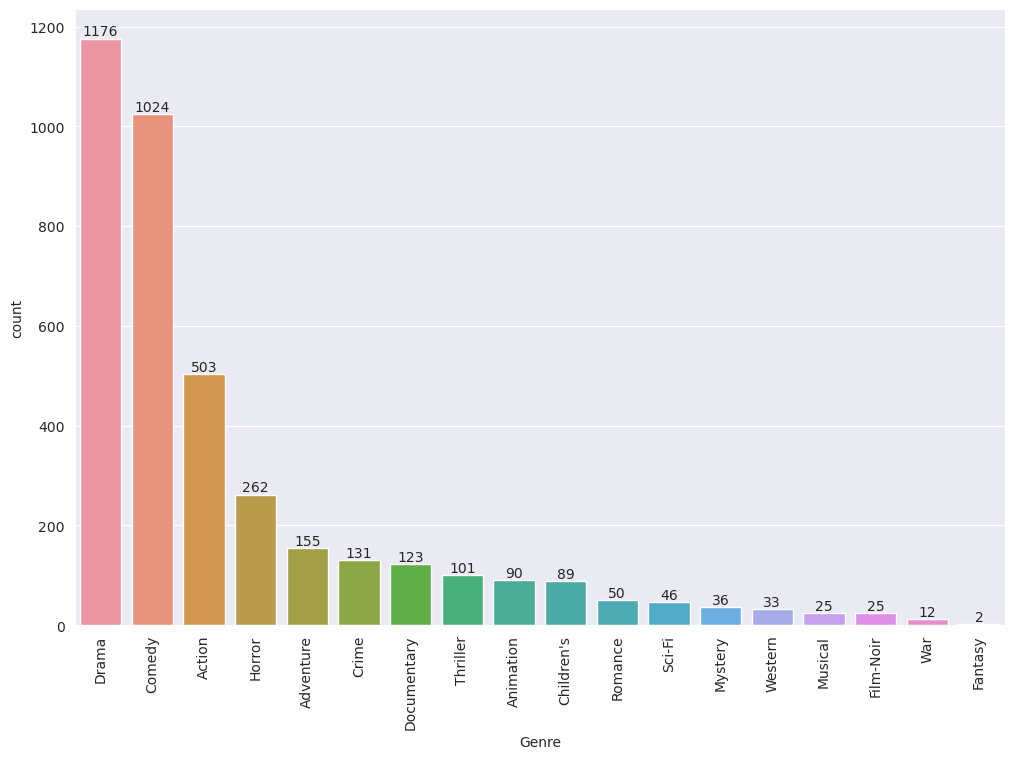

In [150]:
# Histograma

# Configuració de canvas
plt.figure(figsize=(12, 8))

with sns.axes_style("darkgrid"): # with per no configurar sns.axes_style en els pròxims plots
    ax = sns.countplot(x='Genre', data=df, order = df['Genre'].value_counts().index)
    plt.xticks(rotation=90)
    ax.bar_label(ax.containers[0]) # Conteig de registres a cada columna
    plt.title("Gèneres per any", loc="left")

A l'histograma es veu com Drama i Comedy acaparen la majoria de pel·lícules al dataset. De fet, Comedy dobla el número de registres de la categoria següent (Action) i aquesta dobla alhora a la subseqüent (Horror). La resta de categories tenen entre 155 i 2 pel·lícules. <br><br>
L'histograma ha estat triat per la seva simplisitat i efectivitat per entendre la distribució del número de pel·lícules de cada categoria.

In [138]:
!pip install squarify

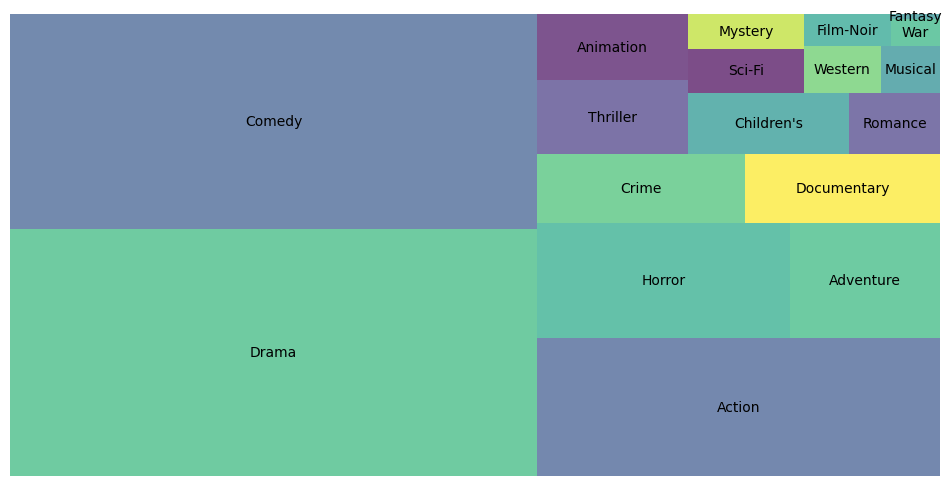

In [147]:
import squarify    # algoritme per plotejar treemaps amb matplotlib

# Configuració de canvas
plt.figure(figsize=(12, 6))

# Treemap
squarify.plot(sizes=df['Genre'].value_counts().values, label=df['Genre'].value_counts().index, alpha=.7)
plt.axis('off')
plt.show()

Segons aquest dataset, als humans el que més ens agrada és riure i plorar: Drama i Comedy representen més del 50% de les pel·lícules. Després d'això, l'adrenalina: Horror, Adventure i Action representen més d'una quarta part del total de pel·lícules.<br><br>
He triat el treemap com a visualització perquè és de fàcil interpretació i m'agrada més per veure proporcions que el pie chart, és més ample i entenedor.

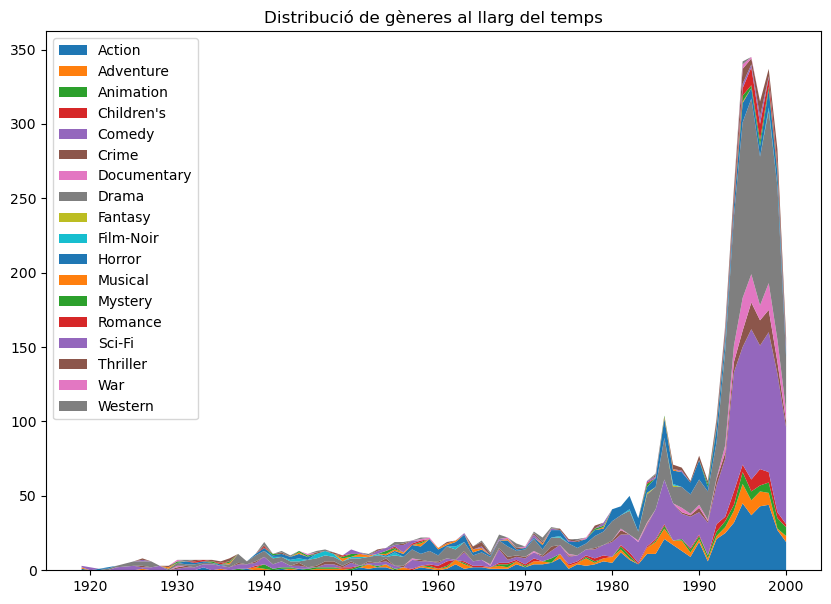

In [189]:
# Agrupació per any i contatge per gènere
grouped = df.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Stackplot
fig, ax = plt.subplots(figsize=(10, 7))
ax.stackplot(grouped.index, grouped.values.T, labels=grouped.columns)

# Títols
ax.set_title('Distribució de gèneres al llarg del temps')
ax.legend(loc='upper left')
plt.show()

En aquesta gràfica s'aprecia bé que a partir de 1990 les pel·lícules es disparen, i de com la tecnologia ha permès la producció progressiva de més i més films (de fet en 1990 comença la digitalització cinematogràfica comercial massiva. Font: https://es.wikipedia.org/wiki/Cinematograf%C3%ADa_digital) <br><br>
Tanmateix, la finalitat d'aquesta gràfica era també saber quina distribució existeix per gèneres a cada any, però com que no es veu clarament farem una altra gràfica a continuació.

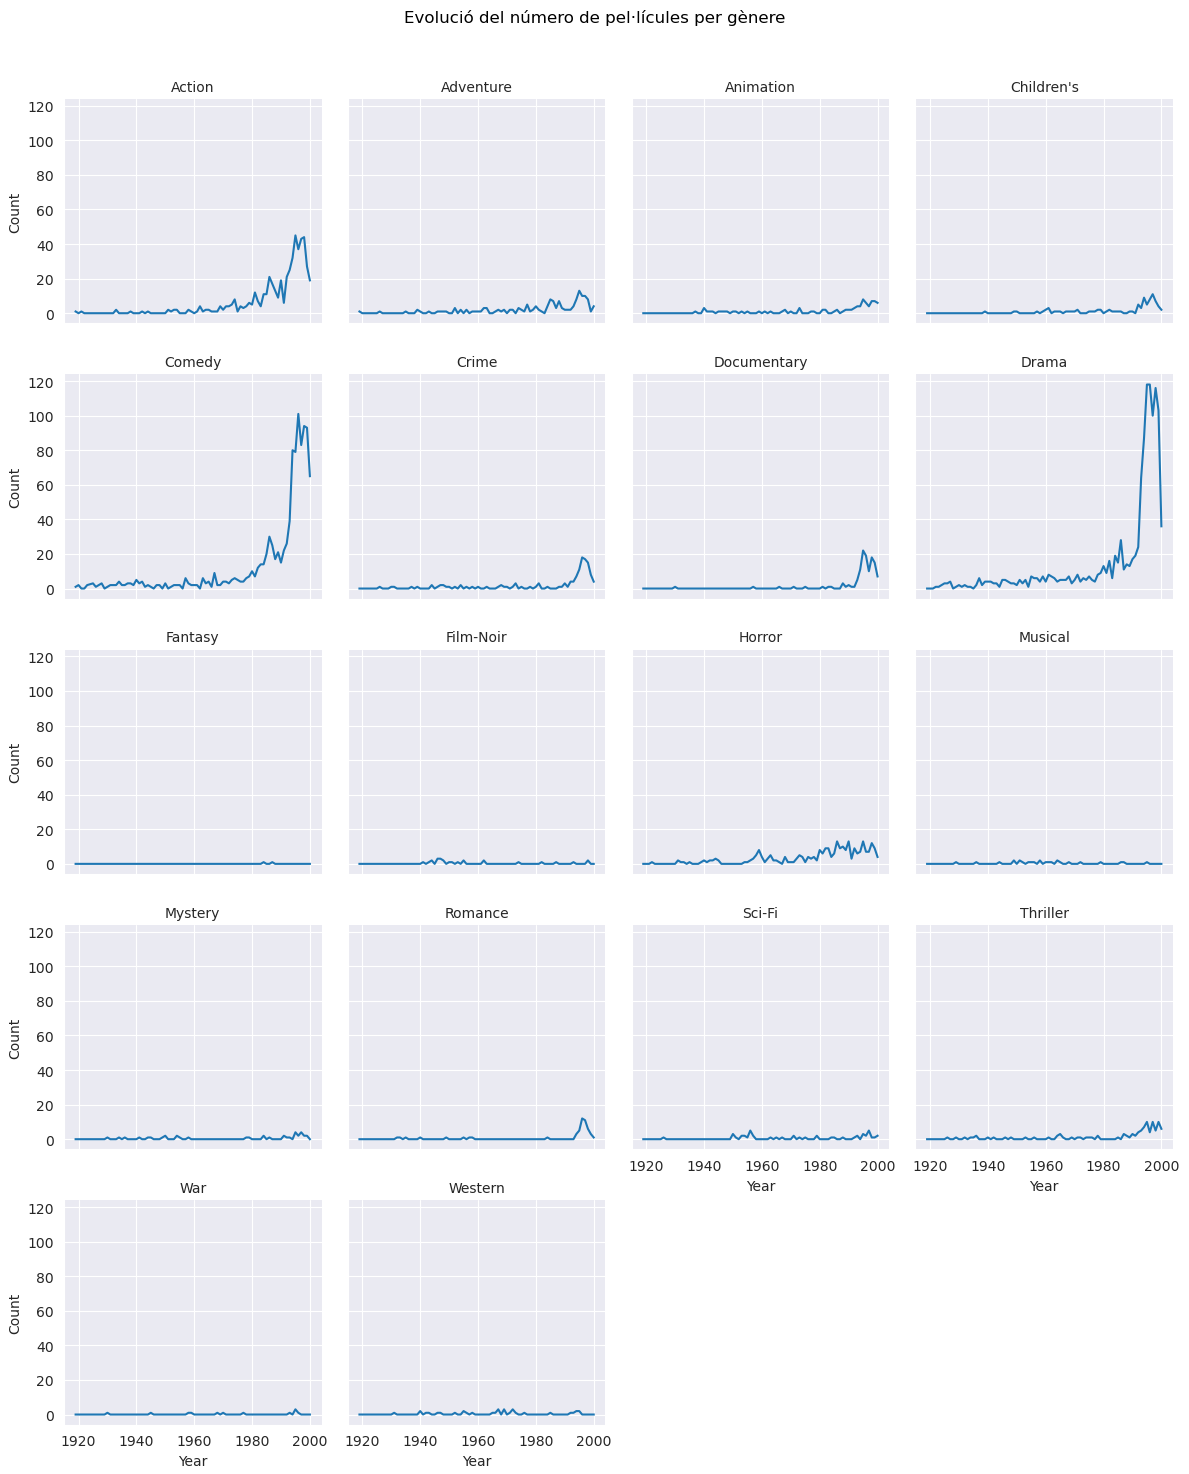

In [186]:
# Contatge per Genre + Year
df_count = df.groupby(['Genre', 'Year']).size().reset_index(name='Count')

# Crea una graella: inicialitza-la
with sns.axes_style("darkgrid"): # with per no configurar sns.axes_style en els pròxims plots
    g = sns.FacetGrid(df_count, col='Genre', col_wrap=4)

# Afegeix el gràfic de línia
g = g.map(plt.plot, 'Year', 'Count')

# Títols
g = g.set_titles("{col_name}")

# Títol general per a tot el gràfic
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolució del número de pel·lícules per gènere')

plt.show()


En aquesta sèrie de lineplots es visualitza la progressió de número de pel·lícules al llarg del temps, per cada gènere.  Film-noir i Western han pujat en el passat però no s'han recuperat després.<br><br>
Comedy i Drama es disparen als 90, seguides de Action.<br><br>
Romance, Crime i Documentary tenen un pic recent.<br><br>
He escollit aquesta sèrie per poder analitzar la progressió en el temps de cada gènere, ja que al gràfic anterior (stacked lineplot) no es podia apreciar cada gènere amb detall.